<a href="https://colab.research.google.com/github/LukynZa/inzio_test/blob/main/Inzio_entry_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation, data clearing and validation

In [30]:
# imports
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# data loading
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/INZIO data sorted.csv')
df = dataset.copy()

In [32]:
display(df)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Věk,Pohlaví,Návštěvy,Tržby,Transakce,Prům. hodnota objednávky,Konverzní poměr elektronického obchodu,Hodnota na jednu návštěvu
1,18-24,female,3208,"124 521,80 Kč",157,"793,13 Kč","4,89 %","38,82 Kč"
2,18-24,male,1307,"60 315,00 Kč",77,"783,31 Kč","5,89 %","46,15 Kč"
3,25-34,female,5231,"302 141,80 Kč",281,"1 075,24 Kč","5,37 %","57,76 Kč"
4,25-34,male,2849,"123 738,00 Kč",130,"951,83 Kč","4,56 %","43,43 Kč"
5,35-44,female,2713,"177 019,80 Kč",127,"1 393,86 Kč","4,68 %","65,25 Kč"
6,35-44,male,1907,"92 316,50 Kč",89,"1 037,26 Kč","4,67 %","48,41 Kč"
7,45-54,female,1691,"124 442,00 Kč",102,"1 220,02 Kč","6,03 %","73,59 Kč"
8,45-54,male,962,"49 856,00 Kč",49,"1 017,47 Kč","5,09 %","51,83 Kč"
9,55-64,female,1522,"87 889,70 Kč",93,"945,05 Kč","6,11 %","57,75 Kč"


In [33]:
df.drop(df.index[0])

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
1,18-24,female,3208,"124 521,80 Kč",157,"793,13 Kč","4,89 %","38,82 Kč"
2,18-24,male,1307,"60 315,00 Kč",77,"783,31 Kč","5,89 %","46,15 Kč"
3,25-34,female,5231,"302 141,80 Kč",281,"1 075,24 Kč","5,37 %","57,76 Kč"
4,25-34,male,2849,"123 738,00 Kč",130,"951,83 Kč","4,56 %","43,43 Kč"
5,35-44,female,2713,"177 019,80 Kč",127,"1 393,86 Kč","4,68 %","65,25 Kč"
6,35-44,male,1907,"92 316,50 Kč",89,"1 037,26 Kč","4,67 %","48,41 Kč"
7,45-54,female,1691,"124 442,00 Kč",102,"1 220,02 Kč","6,03 %","73,59 Kč"
8,45-54,male,962,"49 856,00 Kč",49,"1 017,47 Kč","5,09 %","51,83 Kč"
9,55-64,female,1522,"87 889,70 Kč",93,"945,05 Kč","6,11 %","57,75 Kč"
10,55-64,male,654,"24 562,80 Kč",27,"909,73 Kč","4,13 %","37,56 Kč"


In [34]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [35]:
df.rename(columns={'Prům. hodnota objednávky':'Průměrná objednávka', 'Konverzní poměr elektronického obchodu':'Konverzní poměr', 
                   'Hodnota na jednu návštěvu':'Hodnota návštěvy'},inplace=True)

df.head()

,Věk,Pohlaví,Návštěvy,Tržby,Transakce,Průměrná objednávka,Konverzní poměr,Hodnota návštěvy
1,18-24,female,3208,"124 521,80 Kč",157,"793,13 Kč","4,89 %","38,82 Kč"
2,18-24,male,1307,"60 315,00 Kč",77,"783,31 Kč","5,89 %","46,15 Kč"
3,25-34,female,5231,"302 141,80 Kč",281,"1 075,24 Kč","5,37 %","57,76 Kč"
4,25-34,male,2849,"123 738,00 Kč",130,"951,83 Kč","4,56 %","43,43 Kč"
5,35-44,female,2713,"177 019,80 Kč",127,"1 393,86 Kč","4,68 %","65,25 Kč"


In [36]:
# this will earse "Kč" and replace problematic symbols like ¨,¨ or ¨%¨
df['Tržby'] = df['Tržby'].replace({'Kč': '', ' ': '', ',': '.',}, regex=True)
df['Průměrná objednávka'] = df['Průměrná objednávka'].replace({'Kč': '', ' ': '', ',': '.',}, regex=True)
df['Konverzní poměr'] = df['Konverzní poměr'].replace({'%': '', ',': '.',}, regex=True).astype(float)
df['Hodnota návštěvy'] = df['Hodnota návštěvy'].replace({'Kč': '', ' ': '', ',': '.',}, regex=True).astype(float)

In [37]:
#data types conversion
df['Návštěvy'] = df['Návštěvy'].astype(float)
df['Transakce'] = df['Transakce'].astype(int)

In [38]:
#For some mysterious reason, spaces still remain as the thousands separator. This fixes it.
df.loc[:,'Tržby'] = df['Tržby'].apply(lambda x: float(''.join(x.split())))
df.loc[:,'Průměrná objednávka'] = df['Průměrná objednávka'].apply(lambda x: float(''.join(x.split())))

In [39]:
#df.drop(df.index[0])

In [40]:
# check 1st 5 rows
df.head()

,Věk,Pohlaví,Návštěvy,Tržby,Transakce,Průměrná objednávka,Konverzní poměr,Hodnota návštěvy
1,18-24,female,3208.0,124521.8,157,793.13,4.89,38.82
2,18-24,male,1307.0,60315.0,77,783.31,5.89,46.15
3,25-34,female,5231.0,302141.8,281,1075.24,5.37,57.76
4,25-34,male,2849.0,123738.0,130,951.83,4.56,43.43
5,35-44,female,2713.0,177019.8,127,1393.86,4.68,65.25


In [41]:
# check last 5 rows in DF
df.tail()

,Věk,Pohlaví,Návštěvy,Tržby,Transakce,Průměrná objednávka,Konverzní poměr,Hodnota návštěvy
8,45-54,male,962.0,49856.0,49,1017.47,5.09,51.83
9,55-64,female,1522.0,87889.7,93,945.05,6.11,57.75
10,55-64,male,654.0,24562.8,27,909.73,4.13,37.56
11,65+,female,874.0,54061.0,52,1039.63,5.95,61.85
12,65+,male,435.0,9285.0,9,1031.67,2.07,21.34


In [42]:
# dataset shape check
df.shape

(12, 8)

In [43]:
# column names and their data types
with pd.option_context('display.max_rows', None):
    print(df.dtypes)

0
Věk                     object
Pohlaví                 object
Návštěvy               float64
Tržby                  float64
Transakce                int64
Průměrná objednávka    float64
Konverzní poměr        float64
Hodnota návštěvy       float64
dtype: object


In [44]:
# empty values check
for col in df:
    print((col) + '.........' + str(sum(pd.isnull(df[col]))))

Věk.........0
Pohlaví.........0
Návštěvy.........0
Tržby.........0
Transakce.........0
Průměrná objednávka.........0
Konverzní poměr.........0
Hodnota návštěvy.........0


In [45]:
#specific row check
df.loc[2,:]

0
Věk                      18-24
Pohlaví                   male
Návštěvy                1307.0
Tržby                  60315.0
Transakce                   77
Průměrná objednávka     783.31
Konverzní poměr           5.89
Hodnota návštěvy         46.15
Name: 2, dtype: object

In [46]:
df.describe()

,Návštěvy,Tržby,Transakce,Průměrná objednávka,Konverzní poměr,Hodnota návštěvy
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1946.083333,102512.450000,99.416667,1016.516667,4.953333,50.311667
std,1365.551334,79088.684578,71.891912,168.799845,1.122710,14.185760
min,435.000000,9285.000000,9.000000,783.310000,2.070000,21.340000
25%,940.000000,53009.750000,51.250000,936.220000,4.642500,42.277500
50%,1606.500000,90103.100000,91.000000,1024.570000,4.990000,50.120000
75%,2747.000000,124461.950000,127.750000,1048.532500,5.905000,58.782500
max,5231.000000,302141.800000,281.000000,1393.860000,6.110000,73.590000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 1 to 12
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Věk                  12 non-null     object 
 1   Pohlaví              12 non-null     object 
 2   Návštěvy             12 non-null     float64
 3   Tržby                12 non-null     float64
 4   Transakce            12 non-null     int64  
 5   Průměrná objednávka  12 non-null     float64
 6   Konverzní poměr      12 non-null     float64
 7   Hodnota návštěvy     12 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 900.0+ bytes


# Charts and analysis


    A. Jaký je průměrný konverzní poměr pro všechny věkové skupiny a pohlaví - HOTOVO
    B. Jaké pohlaví a věková skupina návštěvníků nakoupila za nejvíce peněz? - HOTOVO
    C. Jaká je průměrná hodnota objednávky, kterou udělají ženy?
    D. Jaká skupina návštěvníků (věk a pohlaví) se nám vyplatí nejvíce,
    pokud návštěvnost kupujeme přes PPC a musíme za jednu návštěvu zaplatit 10 Kč.

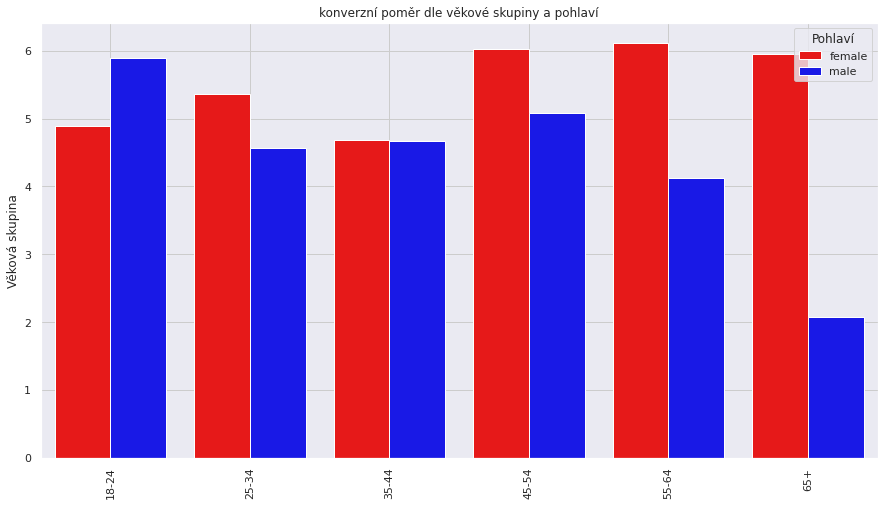

In [48]:
# Some boilerplate to initialise things
sns.set()
plt.figure(figsize=(15,8))

# This is where the actual plot gets made
ax = sns.barplot(data=df, x="Věk", y="Konverzní poměr", hue="Pohlaví", palette=['red', 'blue',], saturation=0.8)

# Customise some display properties
ax.set_title('konverzní poměr dle věkové skupiny a pohlaví')
ax.grid(color='#cccccc')
ax.set_ylabel('Věková skupina')
ax.set_xlabel(None)
ax.set_xticklabels(df["Věk"].unique().astype(str), rotation='90')

# Ask Matplotlib to show it
plt.show()

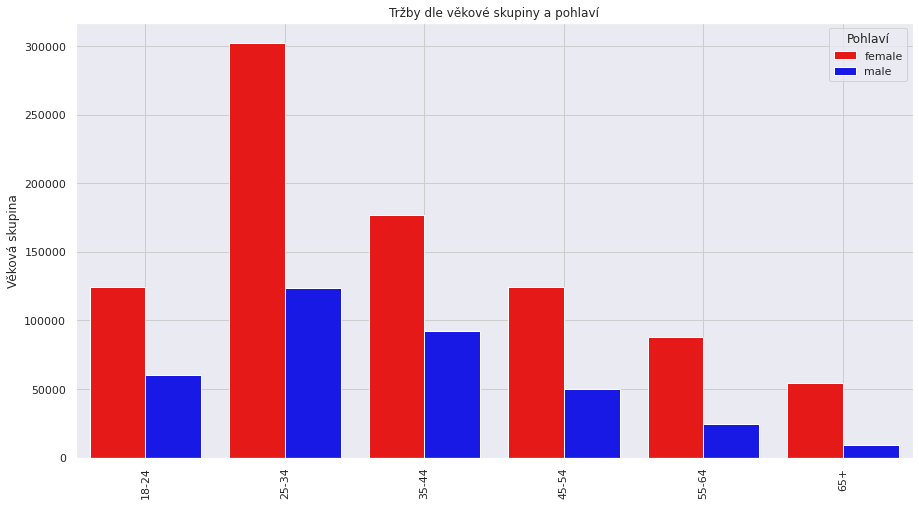

In [49]:
# Some boilerplate to initialise things
sns.set()
plt.figure(figsize=(15,8))

# This is where the actual plot gets made
ax = sns.barplot(data=df, x="Věk", y="Tržby", hue="Pohlaví", palette=['red', 'blue',], saturation=0.8)

# Customise some display properties
ax.set_title('Tržby dle věkové skupiny a pohlaví')
ax.grid(color='#cccccc')
ax.set_ylabel('Věková skupina')
ax.set_xlabel(None)
ax.set_xticklabels(df["Věk"].unique().astype(str), rotation='90')

# Ask Matplotlib to show it
plt.show()

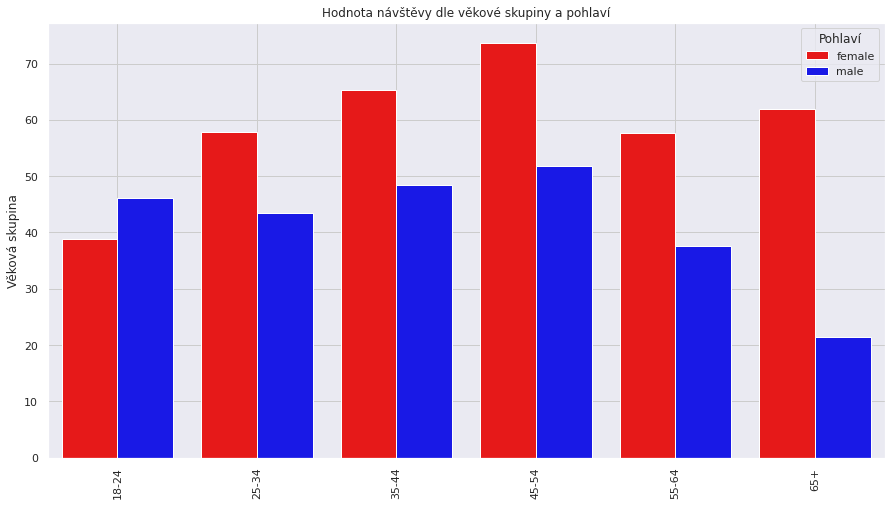

In [50]:
# Some boilerplate to initialise things
sns.set()
plt.figure(figsize=(15,8))

# This is where the actual plot gets made
ax = sns.barplot(data=df, x="Věk", y="Hodnota návštěvy", hue="Pohlaví", palette=['red', 'blue',], saturation=0.8)

# Customise some display properties
ax.set_title('Hodnota návštěvy dle věkové skupiny a pohlaví')
ax.grid(color='#cccccc')
ax.set_ylabel('Věková skupina')
ax.set_xlabel(None)
ax.set_xticklabels(df["Věk"].unique().astype(str), rotation='90')

# Ask Matplotlib to show it
plt.show()

In [51]:
prumenrna_hodnota_objednavky = df.groupby(by=["Pohlaví"], dropna=False).mean()
print(prumenrna_hodnota_objednavky)

0           Návštěvy          Tržby   Transakce  Průměrná objednávka  \
Pohlaví                                                                
female   2539.833333  145012.683333  135.333333          1077.821667   
male     1352.333333   60012.216667   63.500000           955.211667   

0        Konverzní poměr  Hodnota návštěvy  
Pohlaví                                     
female          5.505000         59.170000  
male            4.401667         41.453333  
